---

In this challenge, you will predict healthcare costs using a regression algorithm.

You are given a dataset that contains information about different people including their healthcare costs. Use the data to predict healthcare costs based on new data.

The first two cells of this notebook import libraries and the data.

Make sure to convert categorical data to numbers. Use 80% of the data as the `train_dataset` and 20% of the data as the `test_dataset`.

`pop` off the "expenses" column from these datasets to create new datasets called `train_labels` and `test_labels`. Use these labels when training your model.

Create a model and train it with the `train_dataset`. Run the final cell in this notebook to check your model. The final cell will use the unseen `test_dataset` to check how well the model generalizes.

To pass the challenge, `model.evaluate` must return a Mean Absolute Error of under 3500. This means it predicts health care costs correctly within $3500.

The final cell will also predict expenses using the `test_dataset` and graph the results.

---

In [1]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# try:
#   # %tensorflow_version only exists in Colab.
#   %tensorflow_version 2.x
# except Exception:
#   pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Import data
!wget "https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv"
# dataset_path = keras.utils.get_file("insurance.csv", "https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv")
dataset_path = "insurance.csv"
dataset = pd.read_csv(dataset_path)
dataset.tail()

'wget' is not recognized as an internal or external command,
operable program or batch file.


,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [3]:
catColumns = ["sex", "smoker", "region"]
dataset = pd.get_dummies(dataset, columns = catColumns, drop_first=True)

dataset.head()

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,False,True,False,False,True
1,18,33.8,1,1725.55,True,False,False,True,False
2,28,33.0,3,4449.46,True,False,False,True,False
3,33,22.7,0,21984.47,True,False,True,False,False
4,32,28.9,0,3866.86,True,False,True,False,False


In [4]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

train_labels = train_dataset.pop("expenses")
test_labels = test_dataset.pop("expenses")

In [5]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
age,1070.0,39.036449,14.142122,18.0,26.0,39.0,51.0,64.0
bmi,1070.0,30.737290,6.065193,16.0,26.3,30.5,34.8,53.1
children,1070.0,1.093458,1.211364,0.0,0.0,1.0,2.0,5.0


In [6]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [7]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='relu')
  ])
optimizer = tf.keras.optimizers.RMSprop()

model.compile(loss='mae',
              optimizer=optimizer,
              metrics=['mae','mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1152      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 16193 (63.25 KB)
Trainable params: 16193 (

In [12]:
import numpy as np
import tensorflow as tf

# Split the dataset
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

# Separate features and labels
train_labels = train_dataset.pop("expenses")
test_labels = test_dataset.pop("expenses")

# Convert to NumPy arrays
train_dataset = np.array(train_dataset, dtype=np.float32)
train_labels = np.array(train_labels, dtype=np.float32)

# Ensure shapes are correct
print(train_dataset.shape, train_labels.shape)

# Train the model
EPOCHS = 1000
history = model.fit(
    train_dataset,
    train_labels,
    epochs=EPOCHS,
    validation_split=0.2,
    verbose=1,
    callbacks=[tf.keras.callbacks.ModelCheckpoint("./checkpoint", save_best_only=True, monitor='val_loss')]
)


(1070, 8) (1070,)
Epoch 1/1000
 1/27 [>.............................] - ETA: 1:19 - loss: 10880.3691 - mae: 10880.3691 - mse: 231491536.0000INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 4s 50ms/step - loss: 12549.8232 - mae: 12549.8232 - mse: 297399168.0000 - val_loss: 13800.0000 - val_mae: 13800.0000 - val_mse: 344764288.0000
Epoch 2/1000
27/27 [==============================] - ETA: 0s - loss: 10711.8135 - mae: 10711.8135 - mse: 252002192.0000INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 30ms/step - loss: 10711.8135 - mae: 10711.8135 - mse: 252002192.0000 - val_loss: 10009.8438 - val_mae: 10009.8438 - val_mse: 244530528.0000
Epoch 3/1000
26/27 [===========================>..] - ETA: 0s - loss: 7430.2197 - mae: 7430.2197 - mse: 158617152.0000INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 28ms/step - loss: 7447.7080 - mae: 7447.7080 - mse: 160296960.0000 - val_loss: 7853.8477 - val_mae: 7853.8477 - val_mse: 176049904.0000
Epoch 4/1000
 1/27 [>.............................] - ETA: 0s - loss: 8479.1660 - mae: 8479.1660 - mse: 203224160.0000INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 26ms/step - loss: 7078.2817 - mae: 7078.2817 - mse: 144738560.0000 - val_loss: 7778.3589 - val_mae: 7778.3589 - val_mse: 176752624.0000
Epoch 5/1000
 1/27 [>.............................] - ETA: 0s - loss: 6442.9702 - mae: 6442.9702 - mse: 128279136.0000INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 28ms/step - loss: 6985.6011 - mae: 6985.6011 - mse: 145450368.0000 - val_loss: 7699.5527 - val_mae: 7699.5527 - val_mse: 175428080.0000
Epoch 6/1000
 1/27 [>.............................] - ETA: 0s - loss: 6864.5869 - mae: 6864.5869 - mse: 151235808.0000INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 30ms/step - loss: 6888.9321 - mae: 6888.9321 - mse: 145152960.0000 - val_loss: 7653.6836 - val_mae: 7653.6836 - val_mse: 181946496.0000
Epoch 7/1000
25/27 [==========================>...] - ETA: 0s - loss: 6888.2104 - mae: 6888.2104 - mse: 148769520.0000INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 29ms/step - loss: 6809.0898 - mae: 6809.0898 - mse: 147075792.0000 - val_loss: 7621.9873 - val_mae: 7621.9873 - val_mse: 185765216.0000
Epoch 8/1000
 1/27 [>.............................] - ETA: 0s - loss: 5894.1562 - mae: 5894.1562 - mse: 156927248.0000INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 38ms/step - loss: 6706.3286 - mae: 6706.3286 - mse: 147320224.0000 - val_loss: 7486.8071 - val_mae: 7486.8071 - val_mse: 178507968.0000
Epoch 9/1000
22/27 [=======================>......] - ETA: 0s - loss: 6601.2886 - mae: 6601.2886 - mse: 145370240.0000INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 29ms/step - loss: 6621.7642 - mae: 6621.7642 - mse: 148269408.0000 - val_loss: 7452.1104 - val_mae: 7452.1104 - val_mse: 188153104.0000
Epoch 10/1000
27/27 [==============================] - ETA: 0s - loss: 6524.7090 - mae: 6524.7090 - mse: 149775376.0000INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 29ms/step - loss: 6524.7090 - mae: 6524.7090 - mse: 149775376.0000 - val_loss: 7422.6182 - val_mae: 7422.6182 - val_mse: 191659920.0000
Epoch 11/1000
 1/27 [>.............................] - ETA: 0s - loss: 4914.1431 - mae: 4914.1431 - mse: 122422040.0000INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 29ms/step - loss: 6429.2563 - mae: 6429.2563 - mse: 151017248.0000 - val_loss: 7290.7847 - val_mae: 7290.7847 - val_mse: 190466048.0000
Epoch 12/1000
 1/27 [>.............................] - ETA: 0s - loss: 4669.9395 - mae: 4669.9395 - mse: 90056544.0000INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 30ms/step - loss: 6375.1787 - mae: 6375.1787 - mse: 152013312.0000 - val_loss: 7228.5625 - val_mae: 7228.5625 - val_mse: 187390944.0000
Epoch 13/1000
27/27 [==============================] - 0s 4ms/step - loss: 6329.3296 - mae: 6329.3296 - mse: 152615920.0000 - val_loss: 7258.5083 - val_mae: 7258.5083 - val_mse: 193570784.0000
Epoch 14/1000
 1/27 [>.............................] - ETA: 0s - loss: 5870.2490 - mae: 5870.2490 - mse: 140853792.0000INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 27ms/step - loss: 6306.0483 - mae: 6306.0483 - mse: 152853376.0000 - val_loss: 7183.7510 - val_mae: 7183.7510 - val_mse: 188382816.0000
Epoch 15/1000
 1/27 [>.............................] - ETA: 0s - loss: 3928.5854 - mae: 3928.5854 - mse: 72184664.0000INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 27ms/step - loss: 6291.9893 - mae: 6291.9893 - mse: 151869552.0000 - val_loss: 7177.3657 - val_mae: 7177.3657 - val_mse: 189754896.0000
Epoch 16/1000
 1/27 [>.............................] - ETA: 0s - loss: 6078.6304 - mae: 6078.6304 - mse: 151017440.0000INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 28ms/step - loss: 6275.0503 - mae: 6275.0503 - mse: 152567408.0000 - val_loss: 7155.5127 - val_mae: 7155.5127 - val_mse: 187220560.0000
Epoch 17/1000
27/27 [==============================] - 0s 3ms/step - loss: 6246.3613 - mae: 6246.3613 - mse: 152695200.0000 - val_loss: 7207.0098 - val_mae: 7207.0098 - val_mse: 182052896.0000
Epoch 18/1000
27/27 [==============================] - 0s 4ms/step - loss: 6245.1372 - mae: 6245.1372 - mse: 152506080.0000 - val_loss: 7184.2026 - val_mae: 7184.2026 - val_mse: 182106272.0000
Epoch 19/1000
 1/27 [>.............................] - ETA: 0s - loss: 8397.6582 - mae: 8397.6582 - mse: 229726432.0000INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 37ms/step - loss: 6228.1035 - mae: 6228.1035 - mse: 150917328.0000 - val_loss: 7130.6768 - val_mae: 7130.6768 - val_mse: 190096992.0000
Epoch 20/1000
24/27 [=========================>....] - ETA: 0s - loss: 6148.1323 - mae: 6148.1323 - mse: 151323952.0000INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 27ms/step - loss: 6205.7759 - mae: 6205.7759 - mse: 151069936.0000 - val_loss: 7128.2393 - val_mae: 7128.2393 - val_mse: 190793760.0000
Epoch 21/1000
 1/27 [>.............................] - ETA: 0s - loss: 5074.2451 - mae: 5074.2451 - mse: 141555968.0000INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 25ms/step - loss: 6199.4619 - mae: 6199.4619 - mse: 150409760.0000 - val_loss: 7081.4883 - val_mae: 7081.4883 - val_mse: 184771520.0000
Epoch 22/1000
27/27 [==============================] - 0s 3ms/step - loss: 6189.2017 - mae: 6189.2017 - mse: 150222800.0000 - val_loss: 7370.4663 - val_mae: 7370.4663 - val_mse: 198104112.0000
Epoch 23/1000
 1/27 [>.............................] - ETA: 0s - loss: 4660.9399 - mae: 4660.9399 - mse: 89830576.0000INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 25ms/step - loss: 6161.6484 - mae: 6161.6484 - mse: 150415696.0000 - val_loss: 7051.3271 - val_mae: 7051.3271 - val_mse: 184323888.0000
Epoch 24/1000
 1/27 [>.............................] - ETA: 0s - loss: 8721.0449 - mae: 8721.0449 - mse: 225549520.0000INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 28ms/step - loss: 6149.5796 - mae: 6149.5796 - mse: 149207152.0000 - val_loss: 7038.0518 - val_mae: 7038.0518 - val_mse: 186108032.0000
Epoch 25/1000
 1/27 [>.............................] - ETA: 0s - loss: 4659.6387 - mae: 4659.6387 - mse: 95638080.0000INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 26ms/step - loss: 6134.0527 - mae: 6134.0527 - mse: 148932336.0000 - val_loss: 7014.9756 - val_mae: 7014.9756 - val_mse: 183364576.0000
Epoch 26/1000
27/27 [==============================] - 0s 3ms/step - loss: 6115.3984 - mae: 6115.3984 - mse: 148332608.0000 - val_loss: 7023.8521 - val_mae: 7023.8521 - val_mse: 187243168.0000
Epoch 27/1000
 1/27 [>.............................] - ETA: 0s - loss: 5731.5596 - mae: 5731.5596 - mse: 162806848.0000INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 25ms/step - loss: 6085.9165 - mae: 6085.9165 - mse: 148353232.0000 - val_loss: 6977.4702 - val_mae: 6977.4702 - val_mse: 180804720.0000
Epoch 28/1000
 1/27 [>.............................] - ETA: 0s - loss: 3884.2607 - mae: 3884.2607 - mse: 81805432.0000INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 25ms/step - loss: 6078.1226 - mae: 6078.1226 - mse: 147111776.0000 - val_loss: 6954.5518 - val_mae: 6954.5518 - val_mse: 181264864.0000
Epoch 29/1000
27/27 [==============================] - 0s 3ms/step - loss: 6058.8989 - mae: 6058.8989 - mse: 146735808.0000 - val_loss: 7112.6050 - val_mae: 7112.6050 - val_mse: 190434576.0000
Epoch 30/1000
 1/27 [>.............................] - ETA: 0s - loss: 3356.9038 - mae: 3356.9038 - mse: 61454652.0000INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 36ms/step - loss: 6044.3213 - mae: 6044.3213 - mse: 146280464.0000 - val_loss: 6918.4219 - val_mae: 6918.4219 - val_mse: 182447472.0000
Epoch 31/1000
 1/27 [>.............................] - ETA: 0s - loss: 5981.1792 - mae: 5981.1792 - mse: 146404768.0000INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 27ms/step - loss: 6020.8027 - mae: 6020.8027 - mse: 144825312.0000 - val_loss: 6910.6401 - val_mae: 6910.6401 - val_mse: 183097456.0000
Epoch 32/1000
 1/27 [>.............................] - ETA: 0s - loss: 7110.0239 - mae: 7110.0239 - mse: 190026336.0000INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 30ms/step - loss: 5990.3857 - mae: 5990.3857 - mse: 144147680.0000 - val_loss: 6852.6216 - val_mae: 6852.6216 - val_mse: 177381456.0000
Epoch 33/1000
27/27 [==============================] - 0s 4ms/step - loss: 5972.5874 - mae: 5972.5874 - mse: 142392288.0000 - val_loss: 7200.0654 - val_mae: 7200.0654 - val_mse: 190515376.0000
Epoch 34/1000
27/27 [==============================] - 0s 3ms/step - loss: 5953.0537 - mae: 5953.0537 - mse: 142408496.0000 - val_loss: 6889.5396 - val_mae: 6889.5396 - val_mse: 182861328.0000
Epoch 35/1000
 1/27 [>.............................] - ETA: 0s - loss: 9174.8887 - mae: 9174.8887 - mse: 240232880.0000INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 27ms/step - loss: 5922.8813 - mae: 5922.8813 - mse: 141303696.0000 - val_loss: 6758.5352 - val_mae: 6758.5352 - val_mse: 172048000.0000
Epoch 36/1000
 1/27 [>.............................] - ETA: 0s - loss: 3543.6750 - mae: 3543.6750 - mse: 80188992.0000INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 31ms/step - loss: 5918.5063 - mae: 5918.5063 - mse: 140545680.0000 - val_loss: 6720.8330 - val_mae: 6720.8330 - val_mse: 171354784.0000
Epoch 37/1000
27/27 [==============================] - 0s 3ms/step - loss: 5855.4502 - mae: 5855.4502 - mse: 139544112.0000 - val_loss: 6802.8481 - val_mae: 6802.8481 - val_mse: 163425552.0000
Epoch 38/1000
22/27 [=======================>......] - ETA: 0s - loss: 5598.5693 - mae: 5598.5693 - mse: 130791216.0000INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 30ms/step - loss: 5842.0835 - mae: 5842.0835 - mse: 137531984.0000 - val_loss: 6670.3472 - val_mae: 6670.3472 - val_mse: 164847536.0000
Epoch 39/1000
 1/27 [>.............................] - ETA: 0s - loss: 8818.6924 - mae: 8818.6924 - mse: 212205376.0000INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 28ms/step - loss: 5810.6816 - mae: 5810.6816 - mse: 135859456.0000 - val_loss: 6621.3535 - val_mae: 6621.3535 - val_mse: 171216416.0000
Epoch 40/1000
 1/27 [>.............................] - ETA: 0s - loss: 3806.4751 - mae: 3806.4751 - mse: 72596008.0000INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 28ms/step - loss: 5755.2021 - mae: 5755.2021 - mse: 134839904.0000 - val_loss: 6559.3042 - val_mae: 6559.3042 - val_mse: 167827488.0000
Epoch 41/1000
 1/27 [>.............................] - ETA: 0s - loss: 4181.2554 - mae: 4181.2554 - mse: 66703032.0000INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 35ms/step - loss: 5723.7983 - mae: 5723.7983 - mse: 132028384.0000 - val_loss: 6491.0034 - val_mae: 6491.0034 - val_mse: 163385728.0000
Epoch 42/1000
 1/27 [>.............................] - ETA: 0s - loss: 5847.1191 - mae: 5847.1191 - mse: 166074464.0000INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 25ms/step - loss: 5684.8662 - mae: 5684.8662 - mse: 131626600.0000 - val_loss: 6440.5991 - val_mae: 6440.5991 - val_mse: 162011952.0000
Epoch 43/1000
 1/27 [>.............................] - ETA: 0s - loss: 6136.1885 - mae: 6136.1885 - mse: 139391472.0000INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 26ms/step - loss: 5650.4517 - mae: 5650.4517 - mse: 129915944.0000 - val_loss: 6385.4375 - val_mae: 6385.4375 - val_mse: 159551264.0000
Epoch 44/1000
26/27 [===========================>..] - ETA: 0s - loss: 5562.4307 - mae: 5562.4307 - mse: 127442648.0000INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 27ms/step - loss: 5592.0381 - mae: 5592.0381 - mse: 128108560.0000 - val_loss: 6305.4795 - val_mae: 6305.4795 - val_mse: 155865504.0000
Epoch 45/1000
 1/27 [>.............................] - ETA: 0s - loss: 5177.1836 - mae: 5177.1836 - mse: 90153296.0000INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 26ms/step - loss: 5542.8950 - mae: 5542.8950 - mse: 126424008.0000 - val_loss: 6254.2197 - val_mae: 6254.2197 - val_mse: 148892544.0000
Epoch 46/1000
 1/27 [>.............................] - ETA: 0s - loss: 3652.6646 - mae: 3652.6646 - mse: 66451392.0000INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 31ms/step - loss: 5458.4648 - mae: 5458.4648 - mse: 122528928.0000 - val_loss: 6145.6411 - val_mae: 6145.6411 - val_mse: 149437024.0000
Epoch 47/1000
 1/27 [>.............................] - ETA: 0s - loss: 9933.1055 - mae: 9933.1055 - mse: 275415232.0000INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 28ms/step - loss: 5400.7104 - mae: 5400.7104 - mse: 118445816.0000 - val_loss: 6126.7319 - val_mae: 6126.7319 - val_mse: 149411072.0000
Epoch 48/1000
27/27 [==============================] - 0s 3ms/step - loss: 5306.2471 - mae: 5306.2471 - mse: 115060696.0000 - val_loss: 6258.3628 - val_mae: 6258.3628 - val_mse: 150465648.0000
Epoch 49/1000
 1/27 [>.............................] - ETA: 0s - loss: 4791.7168 - mae: 4791.7168 - mse: 96387968.0000INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 30ms/step - loss: 5207.9907 - mae: 5207.9907 - mse: 111545168.0000 - val_loss: 5880.1304 - val_mae: 5880.1304 - val_mse: 126891728.0000
Epoch 50/1000
20/27 [=====================>........] - ETA: 0s - loss: 5180.6343 - mae: 5180.6343 - mse: 105993816.0000INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 43ms/step - loss: 5065.9990 - mae: 5065.9990 - mse: 104688456.0000 - val_loss: 5579.0156 - val_mae: 5579.0156 - val_mse: 124721952.0000
Epoch 51/1000
27/27 [==============================] - ETA: 0s - loss: 4953.6079 - mae: 4953.6079 - mse: 99985024.0000INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 29ms/step - loss: 4953.6079 - mae: 4953.6079 - mse: 99985024.0000 - val_loss: 5377.8506 - val_mae: 5377.8506 - val_mse: 117281336.0000
Epoch 52/1000
14/27 [==============>...............] - ETA: 0s - loss: 4584.4487 - mae: 4584.4487 - mse: 90142480.0000 INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 28ms/step - loss: 4763.3774 - mae: 4763.3774 - mse: 93380016.0000 - val_loss: 5152.3032 - val_mae: 5152.3032 - val_mse: 110519424.0000
Epoch 53/1000
 1/27 [>.............................] - ETA: 0s - loss: 2525.3289 - mae: 2525.3289 - mse: 33358140.0000INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 28ms/step - loss: 4623.6899 - mae: 4623.6899 - mse: 86512584.0000 - val_loss: 5030.7163 - val_mae: 5030.7163 - val_mse: 106905664.0000
Epoch 54/1000
17/27 [=================>............] - ETA: 0s - loss: 4235.6787 - mae: 4235.6787 - mse: 77547528.0000INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 29ms/step - loss: 4389.5884 - mae: 4389.5884 - mse: 79725440.0000 - val_loss: 4730.8315 - val_mae: 4730.8315 - val_mse: 89468720.0000
Epoch 55/1000
27/27 [==============================] - 0s 3ms/step - loss: 4198.7969 - mae: 4198.7969 - mse: 73337888.0000 - val_loss: 4775.3643 - val_mae: 4775.3643 - val_mse: 93303944.0000
Epoch 56/1000
 1/27 [>.............................] - ETA: 0s - loss: 4015.1125 - mae: 4015.1125 - mse: 68497176.0000INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 27ms/step - loss: 4018.6709 - mae: 4018.6709 - mse: 66621248.0000 - val_loss: 4282.5332 - val_mae: 4282.5332 - val_mse: 77428080.0000
Epoch 57/1000
27/27 [==============================] - 0s 3ms/step - loss: 3908.7585 - mae: 3908.7585 - mse: 60118552.0000 - val_loss: 4395.7407 - val_mae: 4395.7407 - val_mse: 66616096.0000
Epoch 58/1000
27/27 [==============================] - 0s 4ms/step - loss: 3817.3140 - mae: 3817.3140 - mse: 56614860.0000 - val_loss: 4336.9336 - val_mae: 4336.9336 - val_mse: 62501644.0000
Epoch 59/1000
 1/27 [>.............................] - ETA: 0s - loss: 3015.1262 - mae: 3015.1262 - mse: 28195644.0000INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 30ms/step - loss: 3769.3174 - mae: 3769.3174 - mse: 56096628.0000 - val_loss: 4250.9453 - val_mae: 4250.9453 - val_mse: 70493904.0000
Epoch 60/1000
27/27 [==============================] - 0s 4ms/step - loss: 3694.2205 - mae: 3694.2205 - mse: 52902432.0000 - val_loss: 4354.4907 - val_mae: 4354.4907 - val_mse: 57567632.0000
Epoch 61/1000
27/27 [==============================] - ETA: 0s - loss: 3701.8635 - mae: 3701.8635 - mse: 52047868.0000INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 29ms/step - loss: 3701.8635 - mae: 3701.8635 - mse: 52047868.0000 - val_loss: 3998.5308 - val_mae: 3998.5308 - val_mse: 64269076.0000
Epoch 62/1000
27/27 [==============================] - 0s 5ms/step - loss: 3594.3105 - mae: 3594.3105 - mse: 49116284.0000 - val_loss: 4107.1440 - val_mae: 4107.1436 - val_mse: 56158176.0000
Epoch 63/1000
27/27 [==============================] - 0s 4ms/step - loss: 3672.0769 - mae: 3672.0769 - mse: 49287992.0000 - val_loss: 4077.4714 - val_mae: 4077.4714 - val_mse: 54662392.0000
Epoch 64/1000
 1/27 [>.............................] - ETA: 0s - loss: 3974.8047 - mae: 3974.8047 - mse: 47282608.0000INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 38ms/step - loss: 3620.1453 - mae: 3620.1453 - mse: 47883064.0000 - val_loss: 3955.0549 - val_mae: 3955.0549 - val_mse: 59474840.0000
Epoch 65/1000
27/27 [==============================] - 0s 3ms/step - loss: 3614.5842 - mae: 3614.5842 - mse: 46720368.0000 - val_loss: 4403.4541 - val_mae: 4403.4541 - val_mse: 48661424.0000
Epoch 66/1000
 1/27 [>.............................] - ETA: 0s - loss: 3897.0093 - mae: 3897.0093 - mse: 36230876.0000INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 27ms/step - loss: 3513.6821 - mae: 3513.6821 - mse: 43946464.0000 - val_loss: 3814.8726 - val_mae: 3814.8726 - val_mse: 50459228.0000
Epoch 67/1000
27/27 [==============================] - 0s 3ms/step - loss: 3615.8530 - mae: 3615.8530 - mse: 43318596.0000 - val_loss: 4144.9517 - val_mae: 4144.9517 - val_mse: 46499652.0000
Epoch 68/1000
27/27 [==============================] - 0s 3ms/step - loss: 3598.4102 - mae: 3598.4102 - mse: 42640920.0000 - val_loss: 3963.5881 - val_mae: 3963.5881 - val_mse: 52729288.0000
Epoch 69/1000
27/27 [==============================] - 0s 3ms/step - loss: 3501.5718 - mae: 3501.5718 - mse: 42207248.0000 - val_loss: 3939.7317 - val_mae: 3939.7317 - val_mse: 44762916.0000
Epoch 70/1000
27/27 [==============================] - 0s 3ms/step - loss: 3485.7056 - mae: 3485.7056 - mse: 39443048.0000 - val_loss: 4048.8396 - val_mae: 4048.8396 - val_mse: 43752812.0000
Epoch 71/1000
 1/27 [>.............................] - ETA

INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 29ms/step - loss: 3511.0549 - mae: 3511.0549 - mse: 38904064.0000 - val_loss: 3697.3140 - val_mae: 3697.3140 - val_mse: 46240136.0000
Epoch 72/1000
27/27 [==============================] - 0s 4ms/step - loss: 3464.2380 - mae: 3464.2380 - mse: 38693764.0000 - val_loss: 3716.4648 - val_mae: 3716.4648 - val_mse: 45544056.0000
Epoch 73/1000
27/27 [==============================] - 0s 3ms/step - loss: 3419.4316 - mae: 3419.4316 - mse: 37394624.0000 - val_loss: 4020.6724 - val_mae: 4020.6724 - val_mse: 46530040.0000
Epoch 74/1000
 1/27 [>.............................] - ETA: 0s - loss: 3949.6384 - mae: 3949.6384 - mse: 45186536.0000INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 27ms/step - loss: 3455.2903 - mae: 3455.2903 - mse: 37626044.0000 - val_loss: 3665.4639 - val_mae: 3665.4639 - val_mse: 42094476.0000
Epoch 75/1000
27/27 [==============================] - 0s 3ms/step - loss: 3412.1204 - mae: 3412.1204 - mse: 37436740.0000 - val_loss: 3921.2637 - val_mae: 3921.2637 - val_mse: 45028508.0000
Epoch 76/1000
 1/27 [>.............................] - ETA: 0s - loss: 2812.5444 - mae: 2812.5444 - mse: 32058680.0000INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 28ms/step - loss: 3406.3428 - mae: 3406.3428 - mse: 38220416.0000 - val_loss: 3563.9507 - val_mae: 3563.9507 - val_mse: 43170324.0000
Epoch 77/1000
27/27 [==============================] - 0s 3ms/step - loss: 3436.2539 - mae: 3436.2539 - mse: 38626312.0000 - val_loss: 3639.7886 - val_mae: 3639.7886 - val_mse: 42990196.0000
Epoch 78/1000
27/27 [==============================] - 0s 3ms/step - loss: 3384.7339 - mae: 3384.7339 - mse: 38884816.0000 - val_loss: 3668.5879 - val_mae: 3668.5879 - val_mse: 43523656.0000
Epoch 79/1000
27/27 [==============================] - 0s 6ms/step - loss: 3377.6101 - mae: 3377.6101 - mse: 39180908.0000 - val_loss: 3565.2800 - val_mae: 3565.2800 - val_mse: 44181776.0000
Epoch 80/1000
 1/27 [>.............................] - ETA: 0s - loss: 2215.1777 - mae: 2215.1777 - mse: 22549736.0000INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 27ms/step - loss: 3289.4827 - mae: 3289.4827 - mse: 39669520.0000 - val_loss: 3545.5625 - val_mae: 3545.5623 - val_mse: 43406392.0000
Epoch 81/1000
 1/27 [>.............................] - ETA: 0s - loss: 3003.7561 - mae: 3003.7561 - mse: 32275360.0000INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 25ms/step - loss: 3348.7952 - mae: 3348.7952 - mse: 39507144.0000 - val_loss: 3395.0225 - val_mae: 3395.0225 - val_mse: 44502912.0000
Epoch 82/1000
27/27 [==============================] - 0s 3ms/step - loss: 3283.4812 - mae: 3283.4812 - mse: 40220072.0000 - val_loss: 3411.8262 - val_mae: 3411.8262 - val_mse: 45855228.0000
Epoch 83/1000
27/27 [==============================] - 0s 3ms/step - loss: 3293.2825 - mae: 3293.2825 - mse: 41887232.0000 - val_loss: 3506.9265 - val_mae: 3506.9265 - val_mse: 46249992.0000
Epoch 84/1000
27/27 [==============================] - 0s 3ms/step - loss: 3249.9722 - mae: 3249.9722 - mse: 41289852.0000 - val_loss: 4065.6985 - val_mae: 4065.6985 - val_mse: 52566180.0000
Epoch 85/1000
27/27 [==============================] - 0s 3ms/step - loss: 3268.1445 - mae: 3268.1445 - mse: 41062356.0000 - val_loss: 3612.0679 - val_mae: 3612.0679 - val_mse: 45518656.0000
Epoch 86/1000
27/27 [==============================] - 0s 

INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 25ms/step - loss: 3277.3362 - mae: 3277.3362 - mse: 41211792.0000 - val_loss: 3375.9875 - val_mae: 3375.9875 - val_mse: 43854656.0000
Epoch 88/1000
 1/27 [>.............................] - ETA: 0s - loss: 4627.3037 - mae: 4627.3037 - mse: 68840416.0000INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 25ms/step - loss: 3249.4570 - mae: 3249.4570 - mse: 40619876.0000 - val_loss: 3264.2734 - val_mae: 3264.2734 - val_mse: 45696148.0000
Epoch 89/1000
27/27 [==============================] - 0s 5ms/step - loss: 3184.4126 - mae: 3184.4126 - mse: 40303552.0000 - val_loss: 3308.8328 - val_mae: 3308.8328 - val_mse: 44313204.0000
Epoch 90/1000
27/27 [==============================] - 0s 3ms/step - loss: 3237.4155 - mae: 3237.4155 - mse: 42000732.0000 - val_loss: 3794.6602 - val_mae: 3794.6602 - val_mse: 47853796.0000
Epoch 91/1000
27/27 [==============================] - 0s 3ms/step - loss: 3188.2456 - mae: 3188.2456 - mse: 40636228.0000 - val_loss: 3379.5383 - val_mae: 3379.5383 - val_mse: 46786756.0000
Epoch 92/1000
27/27 [==============================] - 0s 3ms/step - loss: 3236.1914 - mae: 3236.1914 - mse: 40519080.0000 - val_loss: 3573.1804 - val_mae: 3573.1804 - val_mse: 42586576.0000
Epoch 93/1000
27/27 [==============================] - 0s 

INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 36ms/step - loss: 3239.4912 - mae: 3239.4912 - mse: 40751660.0000 - val_loss: 3253.1602 - val_mae: 3253.1602 - val_mse: 42466304.0000
Epoch 95/1000
27/27 [==============================] - 0s 3ms/step - loss: 3187.5190 - mae: 3187.5190 - mse: 40388588.0000 - val_loss: 3667.3210 - val_mae: 3667.3210 - val_mse: 46517784.0000
Epoch 96/1000
 1/27 [>.............................] - ETA: 0s - loss: 2707.7385 - mae: 2707.7385 - mse: 26760256.0000INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 26ms/step - loss: 3217.3784 - mae: 3217.3784 - mse: 40529308.0000 - val_loss: 3250.7441 - val_mae: 3250.7441 - val_mse: 41404728.0000
Epoch 97/1000
27/27 [==============================] - 0s 3ms/step - loss: 3189.5674 - mae: 3189.5674 - mse: 40831048.0000 - val_loss: 3484.4895 - val_mae: 3484.4895 - val_mse: 44949524.0000
Epoch 98/1000
 1/27 [>.............................] - ETA: 0s - loss: 3193.5842 - mae: 3193.5842 - mse: 42754124.0000INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 26ms/step - loss: 3159.4062 - mae: 3159.4062 - mse: 39545264.0000 - val_loss: 3211.1250 - val_mae: 3211.1250 - val_mse: 44571020.0000
Epoch 99/1000
19/27 [====================>.........] - ETA: 0s - loss: 3077.1384 - mae: 3077.1384 - mse: 38426156.0000INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 28ms/step - loss: 3189.4795 - mae: 3189.4795 - mse: 40683200.0000 - val_loss: 3186.9541 - val_mae: 3186.9541 - val_mse: 42362324.0000
Epoch 100/1000
26/27 [===========================>..] - ETA: 0s - loss: 3166.3030 - mae: 3166.3030 - mse: 39650824.0000INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 26ms/step - loss: 3128.0210 - mae: 3128.0210 - mse: 38920220.0000 - val_loss: 3175.3689 - val_mae: 3175.3689 - val_mse: 42663708.0000
Epoch 101/1000
 1/27 [>.............................] - ETA: 0s - loss: 3074.4370 - mae: 3074.4370 - mse: 38875072.0000INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 26ms/step - loss: 3185.3645 - mae: 3185.3645 - mse: 40159308.0000 - val_loss: 3165.8071 - val_mae: 3165.8071 - val_mse: 40752344.0000
Epoch 102/1000
27/27 [==============================] - 0s 3ms/step - loss: 3171.0652 - mae: 3171.0652 - mse: 40046560.0000 - val_loss: 3216.7737 - val_mae: 3216.7737 - val_mse: 40668420.0000
Epoch 103/1000
27/27 [==============================] - 0s 3ms/step - loss: 3102.8948 - mae: 3102.8948 - mse: 38121100.0000 - val_loss: 3387.9087 - val_mae: 3387.9087 - val_mse: 41002320.0000
Epoch 104/1000
27/27 [==============================] - 0s 3ms/step - loss: 3197.5923 - mae: 3197.5923 - mse: 40023348.0000 - val_loss: 3184.1492 - val_mae: 3184.1492 - val_mse: 41904192.0000
Epoch 105/1000
27/27 [==============================] - 0s 4ms/step - loss: 3155.7759 - mae: 3155.7759 - mse: 39309468.0000 - val_loss: 3934.4744 - val_mae: 3934.4744 - val_mse: 41238328.0000
Epoch 106/1000
 1/27 [>.............................] 

INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 28ms/step - loss: 3145.6462 - mae: 3145.6462 - mse: 38861576.0000 - val_loss: 3105.1948 - val_mae: 3105.1948 - val_mse: 40924448.0000
Epoch 107/1000
27/27 [==============================] - 0s 3ms/step - loss: 3097.8079 - mae: 3097.8079 - mse: 38569856.0000 - val_loss: 3423.4246 - val_mae: 3423.4246 - val_mse: 38894688.0000
Epoch 108/1000
27/27 [==============================] - 0s 3ms/step - loss: 3118.2527 - mae: 3118.2527 - mse: 37887084.0000 - val_loss: 3131.4438 - val_mae: 3131.4438 - val_mse: 39964448.0000
Epoch 109/1000
27/27 [==============================] - 0s 3ms/step - loss: 3122.9866 - mae: 3122.9866 - mse: 37988444.0000 - val_loss: 3209.9536 - val_mae: 3209.9536 - val_mse: 40952872.0000
Epoch 110/1000
27/27 [==============================] - 0s 3ms/step - loss: 3174.1006 - mae: 3174.1006 - mse: 38998708.0000 - val_loss: 3199.1550 - val_mae: 3199.1550 - val_mse: 39524076.0000
Epoch 111/1000
27/27 [==============================] 

INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 28ms/step - loss: 3134.2202 - mae: 3134.2202 - mse: 38366836.0000 - val_loss: 3028.5481 - val_mae: 3028.5481 - val_mse: 39561032.0000
Epoch 113/1000
27/27 [==============================] - 0s 3ms/step - loss: 3023.3052 - mae: 3023.3052 - mse: 37505384.0000 - val_loss: 3146.1069 - val_mae: 3146.1069 - val_mse: 39838188.0000
Epoch 114/1000
27/27 [==============================] - 0s 4ms/step - loss: 3135.1396 - mae: 3135.1396 - mse: 39246004.0000 - val_loss: 3547.4392 - val_mae: 3547.4392 - val_mse: 38212408.0000
Epoch 115/1000
27/27 [==============================] - 0s 3ms/step - loss: 3072.4153 - mae: 3072.4153 - mse: 37348452.0000 - val_loss: 3286.2229 - val_mae: 3286.2229 - val_mse: 40255948.0000
Epoch 116/1000
27/27 [==============================] - 0s 3ms/step - loss: 3079.5034 - mae: 3079.5034 - mse: 38728236.0000 - val_loss: 3290.3318 - val_mae: 3290.3318 - val_mse: 37414580.0000
Epoch 117/1000
27/27 [==============================] 

INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 40ms/step - loss: 3002.1052 - mae: 3002.1052 - mse: 35850300.0000 - val_loss: 2957.5579 - val_mae: 2957.5579 - val_mse: 39480628.0000
Epoch 123/1000
 1/27 [>.............................] - ETA: 0s - loss: 3349.9092 - mae: 3349.9092 - mse: 43682004.0000INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 29ms/step - loss: 3059.5173 - mae: 3059.5173 - mse: 37182908.0000 - val_loss: 2951.1875 - val_mae: 2951.1875 - val_mse: 36224288.0000
Epoch 124/1000
27/27 [==============================] - 0s 3ms/step - loss: 3010.0117 - mae: 3010.0117 - mse: 36430856.0000 - val_loss: 4148.0176 - val_mae: 4148.0176 - val_mse: 46392108.0000
Epoch 125/1000
27/27 [==============================] - 0s 4ms/step - loss: 3014.4980 - mae: 3014.4980 - mse: 36403324.0000 - val_loss: 3339.2131 - val_mae: 3339.2131 - val_mse: 35932032.0000
Epoch 126/1000
27/27 [==============================] - 0s 3ms/step - loss: 3000.7026 - mae: 3000.7026 - mse: 35690328.0000 - val_loss: 3338.7581 - val_mae: 3338.7581 - val_mse: 36153144.0000
Epoch 127/1000
27/27 [==============================] - 0s 4ms/step - loss: 3038.3049 - mae: 3038.3049 - mse: 36513064.0000 - val_loss: 2975.4614 - val_mae: 2975.4614 - val_mse: 34837696.0000
Epoch 128/1000
27/27 [==============================] 

INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 28ms/step - loss: 2990.7571 - mae: 2990.7571 - mse: 35986824.0000 - val_loss: 2875.9966 - val_mae: 2875.9966 - val_mse: 34053520.0000
Epoch 131/1000
27/27 [==============================] - 0s 3ms/step - loss: 2999.8008 - mae: 2999.8008 - mse: 35727720.0000 - val_loss: 2903.4792 - val_mae: 2903.4792 - val_mse: 33846692.0000
Epoch 132/1000
27/27 [==============================] - 0s 3ms/step - loss: 2938.0076 - mae: 2938.0076 - mse: 35490808.0000 - val_loss: 2979.6355 - val_mae: 2979.6355 - val_mse: 33748172.0000
Epoch 133/1000
27/27 [==============================] - 0s 3ms/step - loss: 2982.8179 - mae: 2982.8179 - mse: 36468336.0000 - val_loss: 3057.3101 - val_mae: 3057.3101 - val_mse: 34164392.0000
Epoch 134/1000
27/27 [==============================] - 0s 3ms/step - loss: 2967.1396 - mae: 2967.1396 - mse: 35226868.0000 - val_loss: 3108.4756 - val_mae: 3108.4756 - val_mse: 35877252.0000
Epoch 135/1000
27/27 [==============================] 

INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 26ms/step - loss: 2936.6326 - mae: 2936.6326 - mse: 34990784.0000 - val_loss: 2847.4839 - val_mae: 2847.4839 - val_mse: 33693724.0000
Epoch 137/1000
17/27 [=================>............] - ETA: 0s - loss: 3062.4297 - mae: 3062.4297 - mse: 36899892.0000INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 27ms/step - loss: 2918.5322 - mae: 2918.5322 - mse: 34925344.0000 - val_loss: 2771.0168 - val_mae: 2771.0168 - val_mse: 33806236.0000
Epoch 138/1000
27/27 [==============================] - 0s 3ms/step - loss: 2905.0403 - mae: 2905.0403 - mse: 34934256.0000 - val_loss: 3102.8613 - val_mae: 3102.8613 - val_mse: 33756668.0000
Epoch 139/1000
27/27 [==============================] - 0s 3ms/step - loss: 2931.4495 - mae: 2931.4495 - mse: 34940900.0000 - val_loss: 2803.3425 - val_mae: 2803.3425 - val_mse: 32272188.0000
Epoch 140/1000
27/27 [==============================] - 0s 3ms/step - loss: 2932.8018 - mae: 2932.8018 - mse: 34734624.0000 - val_loss: 2829.6621 - val_mae: 2829.6621 - val_mse: 31810292.0000
Epoch 141/1000
27/27 [==============================] - 0s 3ms/step - loss: 2919.4343 - mae: 2919.4343 - mse: 34031980.0000 - val_loss: 3351.5981 - val_mae: 3351.5981 - val_mse: 34472704.0000
Epoch 142/1000
 1/27 [>.............................] 

INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 25ms/step - loss: 2884.6311 - mae: 2884.6311 - mse: 34129404.0000 - val_loss: 2692.6069 - val_mae: 2692.6069 - val_mse: 32452840.0000
Epoch 143/1000
27/27 [==============================] - 0s 3ms/step - loss: 2893.8567 - mae: 2893.8567 - mse: 34479340.0000 - val_loss: 2778.3101 - val_mae: 2778.3101 - val_mse: 31249364.0000
Epoch 144/1000
27/27 [==============================] - 0s 3ms/step - loss: 2883.1416 - mae: 2883.1416 - mse: 34676436.0000 - val_loss: 2901.5193 - val_mae: 2901.5193 - val_mse: 32844130.0000
Epoch 145/1000
27/27 [==============================] - 0s 3ms/step - loss: 2833.9448 - mae: 2833.9448 - mse: 34069600.0000 - val_loss: 2788.1340 - val_mae: 2788.1340 - val_mse: 33058252.0000
Epoch 146/1000
27/27 [==============================] - 0s 3ms/step - loss: 2890.7361 - mae: 2890.7361 - mse: 34445660.0000 - val_loss: 2741.2026 - val_mae: 2741.2026 - val_mse: 32588998.0000
Epoch 147/1000
27/27 [==============================] 

INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 28ms/step - loss: 2827.2966 - mae: 2827.2966 - mse: 33609000.0000 - val_loss: 2683.2407 - val_mae: 2683.2407 - val_mse: 31882068.0000
Epoch 149/1000
27/27 [==============================] - 0s 3ms/step - loss: 2887.2600 - mae: 2887.2600 - mse: 33952848.0000 - val_loss: 2981.3716 - val_mae: 2981.3716 - val_mse: 32557430.0000
Epoch 150/1000
27/27 [==============================] - 0s 3ms/step - loss: 2795.1470 - mae: 2795.1470 - mse: 33436968.0000 - val_loss: 2852.8962 - val_mae: 2852.8962 - val_mse: 31542288.0000
Epoch 151/1000
23/27 [========================>.....] - ETA: 0s - loss: 2911.5747 - mae: 2911.5747 - mse: 35061484.0000INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 30ms/step - loss: 2914.1848 - mae: 2914.1848 - mse: 34243160.0000 - val_loss: 2668.1606 - val_mae: 2668.1606 - val_mse: 30795688.0000
Epoch 152/1000
27/27 [==============================] - 0s 3ms/step - loss: 2826.1892 - mae: 2826.1892 - mse: 33430328.0000 - val_loss: 2699.0420 - val_mae: 2699.0420 - val_mse: 30291728.0000
Epoch 153/1000
27/27 [==============================] - 0s 3ms/step - loss: 2779.4187 - mae: 2779.4187 - mse: 33961084.0000 - val_loss: 2931.6716 - val_mae: 2931.6716 - val_mse: 32907690.0000
Epoch 154/1000
27/27 [==============================] - 0s 4ms/step - loss: 2829.7881 - mae: 2829.7881 - mse: 34047120.0000 - val_loss: 2734.6997 - val_mae: 2734.6997 - val_mse: 32083756.0000
Epoch 155/1000
27/27 [==============================] - 0s 3ms/step - loss: 2818.0776 - mae: 2818.0776 - mse: 34195812.0000 - val_loss: 3489.6553 - val_mae: 3489.6553 - val_mse: 36818116.0000
Epoch 156/1000
27/27 [==============================] 

INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 27ms/step - loss: 2744.8706 - mae: 2744.8706 - mse: 32703198.0000 - val_loss: 2577.6982 - val_mae: 2577.6982 - val_mse: 30106476.0000
Epoch 162/1000
27/27 [==============================] - 0s 3ms/step - loss: 2709.8159 - mae: 2709.8159 - mse: 32356276.0000 - val_loss: 3416.0815 - val_mae: 3416.0815 - val_mse: 34279656.0000
Epoch 163/1000
27/27 [==============================] - 0s 3ms/step - loss: 2694.2312 - mae: 2694.2312 - mse: 31338668.0000 - val_loss: 3290.6279 - val_mae: 3290.6279 - val_mse: 32757228.0000
Epoch 164/1000
27/27 [==============================] - 0s 3ms/step - loss: 2714.2542 - mae: 2714.2542 - mse: 32280212.0000 - val_loss: 2601.7117 - val_mae: 2601.7117 - val_mse: 29870230.0000
Epoch 165/1000
27/27 [==============================] - 0s 3ms/step - loss: 2726.4692 - mae: 2726.4692 - mse: 32443512.0000 - val_loss: 2702.0515 - val_mae: 2702.0515 - val_mse: 30539272.0000
Epoch 166/1000
27/27 [==============================] 

INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 38ms/step - loss: 2677.2681 - mae: 2677.2681 - mse: 31822394.0000 - val_loss: 2504.5193 - val_mae: 2504.5193 - val_mse: 29672504.0000
Epoch 171/1000
27/27 [==============================] - 0s 3ms/step - loss: 2683.0266 - mae: 2683.0266 - mse: 31801834.0000 - val_loss: 2674.5090 - val_mae: 2674.5090 - val_mse: 31485112.0000
Epoch 172/1000
27/27 [==============================] - 0s 3ms/step - loss: 2663.4863 - mae: 2663.4863 - mse: 32273844.0000 - val_loss: 2768.0144 - val_mae: 2768.0144 - val_mse: 31302714.0000
Epoch 173/1000
 1/27 [>.............................] - ETA: 0s - loss: 2194.3906 - mae: 2194.3906 - mse: 30213232.0000INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 27ms/step - loss: 2600.3630 - mae: 2600.3630 - mse: 31551698.0000 - val_loss: 2477.7407 - val_mae: 2477.7407 - val_mse: 30534874.0000
Epoch 174/1000
27/27 [==============================] - 0s 6ms/step - loss: 2624.9167 - mae: 2624.9167 - mse: 31387924.0000 - val_loss: 2583.1873 - val_mae: 2583.1873 - val_mse: 30372486.0000
Epoch 175/1000
27/27 [==============================] - 0s 3ms/step - loss: 2628.6277 - mae: 2628.6277 - mse: 31784638.0000 - val_loss: 2915.6812 - val_mae: 2915.6812 - val_mse: 32832466.0000
Epoch 176/1000
27/27 [==============================] - 0s 3ms/step - loss: 2692.3923 - mae: 2692.3923 - mse: 31630738.0000 - val_loss: 2594.8142 - val_mae: 2594.8142 - val_mse: 28860608.0000
Epoch 177/1000
27/27 [==============================] - 0s 3ms/step - loss: 2595.5964 - mae: 2595.5964 - mse: 31375194.0000 - val_loss: 2583.6499 - val_mae: 2583.6499 - val_mse: 28786436.0000
Epoch 178/1000
27/27 [==============================] 

INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 26ms/step - loss: 2561.1621 - mae: 2561.1621 - mse: 30333998.0000 - val_loss: 2446.9199 - val_mae: 2446.9199 - val_mse: 28850920.0000
Epoch 185/1000
27/27 [==============================] - 0s 3ms/step - loss: 2598.9526 - mae: 2598.9526 - mse: 31208206.0000 - val_loss: 2727.6445 - val_mae: 2727.6445 - val_mse: 29631150.0000
Epoch 186/1000
27/27 [==============================] - 0s 5ms/step - loss: 2550.9927 - mae: 2550.9927 - mse: 30243384.0000 - val_loss: 2453.6523 - val_mae: 2453.6523 - val_mse: 29020560.0000
Epoch 187/1000
27/27 [==============================] - 0s 4ms/step - loss: 2541.6355 - mae: 2541.6355 - mse: 30040186.0000 - val_loss: 2452.6501 - val_mae: 2452.6501 - val_mse: 29730902.0000
Epoch 188/1000
27/27 [==============================] - 0s 3ms/step - loss: 2553.6321 - mae: 2553.6321 - mse: 30319460.0000 - val_loss: 2807.0149 - val_mae: 2807.0149 - val_mse: 30032066.0000
Epoch 189/1000
27/27 [==============================] 

INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 35ms/step - loss: 2537.7559 - mae: 2537.7559 - mse: 29898084.0000 - val_loss: 2427.1587 - val_mae: 2427.1587 - val_mse: 28268084.0000
Epoch 194/1000
27/27 [==============================] - 0s 3ms/step - loss: 2513.7236 - mae: 2513.7236 - mse: 29738060.0000 - val_loss: 3037.9644 - val_mae: 3037.9644 - val_mse: 30659714.0000
Epoch 195/1000
20/27 [=====================>........] - ETA: 0s - loss: 2501.0210 - mae: 2501.0210 - mse: 28750662.0000INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 31ms/step - loss: 2574.4150 - mae: 2574.4150 - mse: 29909646.0000 - val_loss: 2411.8931 - val_mae: 2411.8931 - val_mse: 28294078.0000
Epoch 196/1000
27/27 [==============================] - 0s 4ms/step - loss: 2505.4854 - mae: 2505.4854 - mse: 30044868.0000 - val_loss: 2456.3264 - val_mae: 2456.3264 - val_mse: 28324690.0000
Epoch 197/1000
27/27 [==============================] - 0s 4ms/step - loss: 2517.5837 - mae: 2517.5837 - mse: 29707738.0000 - val_loss: 2758.9980 - val_mae: 2758.9980 - val_mse: 29252264.0000
Epoch 198/1000
27/27 [==============================] - 0s 3ms/step - loss: 2537.6833 - mae: 2537.6833 - mse: 29955186.0000 - val_loss: 2422.2988 - val_mae: 2422.2988 - val_mse: 27992162.0000
Epoch 199/1000
27/27 [==============================] - 0s 3ms/step - loss: 2474.3093 - mae: 2474.3093 - mse: 29495002.0000 - val_loss: 2827.6531 - val_mae: 2827.6531 - val_mse: 30125970.0000
Epoch 200/1000
27/27 [==============================] 

INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 32ms/step - loss: 2433.5693 - mae: 2433.5693 - mse: 29394868.0000 - val_loss: 2335.5713 - val_mae: 2335.5713 - val_mse: 28395426.0000
Epoch 208/1000
27/27 [==============================] - 0s 4ms/step - loss: 2435.9180 - mae: 2435.9180 - mse: 28888466.0000 - val_loss: 2660.3855 - val_mae: 2660.3855 - val_mse: 28356414.0000
Epoch 209/1000
27/27 [==============================] - 0s 3ms/step - loss: 2430.7756 - mae: 2430.7756 - mse: 28558084.0000 - val_loss: 2550.0254 - val_mae: 2550.0254 - val_mse: 27719452.0000
Epoch 210/1000
27/27 [==============================] - 0s 4ms/step - loss: 2419.5649 - mae: 2419.5649 - mse: 28739694.0000 - val_loss: 2717.2004 - val_mae: 2717.2004 - val_mse: 28541608.0000
Epoch 211/1000
27/27 [==============================] - 0s 4ms/step - loss: 2449.9224 - mae: 2449.9224 - mse: 29399002.0000 - val_loss: 2438.4961 - val_mae: 2438.4961 - val_mse: 27547370.0000
Epoch 212/1000
27/27 [==============================] 

INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 39ms/step - loss: 2476.9761 - mae: 2476.9761 - mse: 29217072.0000 - val_loss: 2327.1260 - val_mae: 2327.1260 - val_mse: 26701166.0000
Epoch 214/1000
27/27 [==============================] - 0s 4ms/step - loss: 2387.6565 - mae: 2387.6565 - mse: 28237434.0000 - val_loss: 2629.3855 - val_mae: 2629.3855 - val_mse: 28608704.0000
Epoch 215/1000
 1/27 [>.............................] - ETA: 0s - loss: 1871.4409 - mae: 1871.4409 - mse: 18186672.0000INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 27ms/step - loss: 2420.8325 - mae: 2420.8325 - mse: 28719810.0000 - val_loss: 2290.4746 - val_mae: 2290.4746 - val_mse: 27866470.0000
Epoch 216/1000
27/27 [==============================] - 0s 4ms/step - loss: 2402.1848 - mae: 2402.1848 - mse: 28405332.0000 - val_loss: 2513.5352 - val_mae: 2513.5352 - val_mse: 26763814.0000
Epoch 217/1000
27/27 [==============================] - 0s 3ms/step - loss: 2402.3206 - mae: 2402.3206 - mse: 27913282.0000 - val_loss: 2338.0757 - val_mae: 2338.0757 - val_mse: 26771882.0000
Epoch 218/1000
27/27 [==============================] - 0s 3ms/step - loss: 2398.3652 - mae: 2398.3652 - mse: 28035190.0000 - val_loss: 2302.2222 - val_mae: 2302.2222 - val_mse: 26234866.0000
Epoch 219/1000
 1/27 [>.............................] - ETA: 0s - loss: 676.0911 - mae: 676.0911 - mse: 1315211.7500INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 2s 66ms/step - loss: 2408.8394 - mae: 2408.8394 - mse: 28401598.0000 - val_loss: 2289.3625 - val_mae: 2289.3625 - val_mse: 26560212.0000
Epoch 220/1000
27/27 [==============================] - 0s 3ms/step - loss: 2352.9270 - mae: 2352.9270 - mse: 28053062.0000 - val_loss: 2627.5403 - val_mae: 2627.5403 - val_mse: 27656432.0000
Epoch 221/1000
27/27 [==============================] - 0s 3ms/step - loss: 2425.7703 - mae: 2425.7703 - mse: 28242058.0000 - val_loss: 2398.5188 - val_mae: 2398.5188 - val_mse: 26824946.0000
Epoch 222/1000
27/27 [==============================] - 0s 3ms/step - loss: 2368.3547 - mae: 2368.3547 - mse: 27479962.0000 - val_loss: 2660.3391 - val_mae: 2660.3391 - val_mse: 26855268.0000
Epoch 223/1000
27/27 [==============================] - 0s 3ms/step - loss: 2345.8381 - mae: 2345.8381 - mse: 27346074.0000 - val_loss: 2566.1104 - val_mae: 2566.1104 - val_mse: 27314440.0000
Epoch 224/1000
27/27 [==============================] 

INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 26ms/step - loss: 2317.2751 - mae: 2317.2751 - mse: 26219784.0000 - val_loss: 2216.7751 - val_mae: 2216.7751 - val_mse: 26138586.0000
Epoch 234/1000
27/27 [==============================] - 0s 4ms/step - loss: 2328.6443 - mae: 2328.6443 - mse: 27405090.0000 - val_loss: 2477.8679 - val_mae: 2477.8679 - val_mse: 26558584.0000
Epoch 235/1000
27/27 [==============================] - 0s 3ms/step - loss: 2337.5461 - mae: 2337.5461 - mse: 26616536.0000 - val_loss: 2396.6604 - val_mae: 2396.6604 - val_mse: 25557874.0000
Epoch 236/1000
27/27 [==============================] - 0s 3ms/step - loss: 2302.0439 - mae: 2302.0439 - mse: 26366888.0000 - val_loss: 2265.3740 - val_mae: 2265.3740 - val_mse: 25282220.0000
Epoch 237/1000
 1/27 [>.............................] - ETA: 0s - loss: 2709.5425 - mae: 2709.5425 - mse: 30306624.0000INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 25ms/step - loss: 2287.6824 - mae: 2287.6824 - mse: 26575282.0000 - val_loss: 2163.9172 - val_mae: 2163.9172 - val_mse: 25617326.0000
Epoch 238/1000
27/27 [==============================] - 0s 3ms/step - loss: 2288.2800 - mae: 2288.2800 - mse: 26127004.0000 - val_loss: 2235.7476 - val_mae: 2235.7476 - val_mse: 25372938.0000
Epoch 239/1000
27/27 [==============================] - 0s 3ms/step - loss: 2321.3752 - mae: 2321.3752 - mse: 26332466.0000 - val_loss: 2370.6052 - val_mae: 2370.6052 - val_mse: 24965086.0000
Epoch 240/1000
27/27 [==============================] - 0s 3ms/step - loss: 2247.7273 - mae: 2247.7273 - mse: 25906660.0000 - val_loss: 2361.4331 - val_mae: 2361.4331 - val_mse: 24633792.0000
Epoch 241/1000
27/27 [==============================] - 0s 3ms/step - loss: 2285.3684 - mae: 2285.3684 - mse: 25806214.0000 - val_loss: 2669.5015 - val_mae: 2669.5015 - val_mse: 26942956.0000
Epoch 242/1000
27/27 [==============================] 

INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 27ms/step - loss: 2283.7964 - mae: 2283.7964 - mse: 25919688.0000 - val_loss: 2158.0662 - val_mae: 2158.0662 - val_mse: 24861600.0000
Epoch 247/1000
27/27 [==============================] - 0s 4ms/step - loss: 2239.7239 - mae: 2239.7239 - mse: 25763696.0000 - val_loss: 2365.2622 - val_mae: 2365.2622 - val_mse: 25407668.0000
Epoch 248/1000
27/27 [==============================] - 0s 3ms/step - loss: 2285.3523 - mae: 2285.3523 - mse: 25680588.0000 - val_loss: 2236.0498 - val_mae: 2236.0498 - val_mse: 25400662.0000
Epoch 249/1000
27/27 [==============================] - 0s 3ms/step - loss: 2233.2551 - mae: 2233.2551 - mse: 25856472.0000 - val_loss: 2384.4607 - val_mae: 2384.4607 - val_mse: 24284606.0000
Epoch 250/1000
 1/27 [>.............................] - ETA: 0s - loss: 1937.5696 - mae: 1937.5696 - mse: 19785052.0000INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 27ms/step - loss: 2212.9138 - mae: 2212.9138 - mse: 24819692.0000 - val_loss: 2113.7065 - val_mae: 2113.7065 - val_mse: 24829976.0000
Epoch 251/1000
27/27 [==============================] - 0s 2ms/step - loss: 2225.3062 - mae: 2225.3062 - mse: 25186024.0000 - val_loss: 2315.4976 - val_mae: 2315.4976 - val_mse: 24227546.0000
Epoch 252/1000
27/27 [==============================] - 0s 3ms/step - loss: 2262.5842 - mae: 2262.5842 - mse: 25604840.0000 - val_loss: 2221.1194 - val_mae: 2221.1194 - val_mse: 24897626.0000
Epoch 253/1000
27/27 [==============================] - 0s 3ms/step - loss: 2235.3804 - mae: 2235.3804 - mse: 25552844.0000 - val_loss: 2323.1360 - val_mae: 2323.1360 - val_mse: 25190008.0000
Epoch 254/1000
27/27 [==============================] - 0s 4ms/step - loss: 2217.1619 - mae: 2217.1619 - mse: 25393226.0000 - val_loss: 2126.6116 - val_mae: 2126.6116 - val_mse: 24238472.0000
Epoch 255/1000
27/27 [==============================] 

INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 28ms/step - loss: 2164.0430 - mae: 2164.0430 - mse: 23837712.0000 - val_loss: 2050.1055 - val_mae: 2050.1055 - val_mse: 23926378.0000
Epoch 277/1000
27/27 [==============================] - 0s 4ms/step - loss: 2164.3906 - mae: 2164.3906 - mse: 24142572.0000 - val_loss: 2237.4622 - val_mae: 2237.4622 - val_mse: 23410970.0000
Epoch 278/1000
27/27 [==============================] - 0s 3ms/step - loss: 2135.2207 - mae: 2135.2207 - mse: 23864176.0000 - val_loss: 2146.5317 - val_mae: 2146.5317 - val_mse: 23553058.0000
Epoch 279/1000
27/27 [==============================] - 0s 3ms/step - loss: 2131.4700 - mae: 2131.4700 - mse: 23640682.0000 - val_loss: 2367.0430 - val_mae: 2367.0430 - val_mse: 23045134.0000
Epoch 280/1000
27/27 [==============================] - 0s 5ms/step - loss: 2189.9028 - mae: 2189.9028 - mse: 24054624.0000 - val_loss: 2438.8167 - val_mae: 2438.8167 - val_mse: 24487256.0000
Epoch 281/1000
27/27 [==============================] 

INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 30ms/step - loss: 2134.1709 - mae: 2134.1709 - mse: 23695800.0000 - val_loss: 2031.2798 - val_mae: 2031.2798 - val_mse: 22592036.0000
Epoch 285/1000
27/27 [==============================] - 0s 3ms/step - loss: 2109.5483 - mae: 2109.5483 - mse: 23479416.0000 - val_loss: 2418.5049 - val_mae: 2418.5049 - val_mse: 24458838.0000
Epoch 286/1000
 1/27 [>.............................] - ETA: 0s - loss: 3636.1885 - mae: 3636.1885 - mse: 54836076.0000INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 29ms/step - loss: 2130.4080 - mae: 2130.4080 - mse: 23537010.0000 - val_loss: 2019.3906 - val_mae: 2019.3906 - val_mse: 22662874.0000
Epoch 287/1000
27/27 [==============================] - 0s 3ms/step - loss: 2077.3420 - mae: 2077.3420 - mse: 22936370.0000 - val_loss: 2422.7727 - val_mae: 2422.7727 - val_mse: 22054644.0000
Epoch 288/1000
 1/27 [>.............................] - ETA: 0s - loss: 3209.5652 - mae: 3209.5652 - mse: 32829048.0000INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 2s 58ms/step - loss: 2087.1558 - mae: 2087.1558 - mse: 23223898.0000 - val_loss: 1982.7336 - val_mae: 1982.7336 - val_mse: 22867516.0000
Epoch 289/1000
27/27 [==============================] - 0s 4ms/step - loss: 2074.9431 - mae: 2074.9431 - mse: 23487222.0000 - val_loss: 2200.2266 - val_mae: 2200.2266 - val_mse: 22238724.0000
Epoch 290/1000
27/27 [==============================] - 0s 3ms/step - loss: 2091.7539 - mae: 2091.7539 - mse: 22896956.0000 - val_loss: 2189.0125 - val_mae: 2189.0125 - val_mse: 22213592.0000
Epoch 291/1000
27/27 [==============================] - 0s 3ms/step - loss: 2107.4795 - mae: 2107.4795 - mse: 23352218.0000 - val_loss: 2184.8193 - val_mae: 2184.8193 - val_mse: 23302072.0000
Epoch 292/1000
27/27 [==============================] - 0s 3ms/step - loss: 2095.8569 - mae: 2095.8569 - mse: 22927384.0000 - val_loss: 2232.7000 - val_mae: 2232.7000 - val_mse: 22799814.0000
Epoch 293/1000
27/27 [==============================] 

INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 25ms/step - loss: 2067.0991 - mae: 2067.0991 - mse: 22710688.0000 - val_loss: 1966.8271 - val_mae: 1966.8271 - val_mse: 21916928.0000
Epoch 298/1000
 1/27 [>.............................] - ETA: 0s - loss: 1299.7788 - mae: 1299.7788 - mse: 9451543.0000INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 26ms/step - loss: 2084.3130 - mae: 2084.3130 - mse: 22764018.0000 - val_loss: 1961.5243 - val_mae: 1961.5243 - val_mse: 22054756.0000
Epoch 299/1000
27/27 [==============================] - 0s 3ms/step - loss: 2061.3931 - mae: 2061.3931 - mse: 22512014.0000 - val_loss: 2459.2637 - val_mae: 2459.2637 - val_mse: 24132144.0000
Epoch 300/1000
27/27 [==============================] - 0s 3ms/step - loss: 2130.2290 - mae: 2130.2290 - mse: 23538494.0000 - val_loss: 2116.2073 - val_mae: 2116.2073 - val_mse: 21771688.0000
Epoch 301/1000
27/27 [==============================] - 0s 3ms/step - loss: 2094.9851 - mae: 2094.9851 - mse: 22659132.0000 - val_loss: 2082.0710 - val_mae: 2082.0710 - val_mse: 23765114.0000
Epoch 302/1000
27/27 [==============================] - 0s 3ms/step - loss: 2054.5139 - mae: 2054.5139 - mse: 22702008.0000 - val_loss: 2184.4099 - val_mae: 2184.4099 - val_mse: 21396140.0000
Epoch 303/1000
27/27 [==============================] 

INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 26ms/step - loss: 2068.9365 - mae: 2068.9365 - mse: 22447956.0000 - val_loss: 1937.6423 - val_mae: 1937.6423 - val_mse: 21607338.0000
Epoch 313/1000
27/27 [==============================] - 0s 5ms/step - loss: 2066.9521 - mae: 2066.9521 - mse: 22680848.0000 - val_loss: 2131.0398 - val_mae: 2131.0398 - val_mse: 22713368.0000
Epoch 314/1000
27/27 [==============================] - 0s 3ms/step - loss: 2017.7781 - mae: 2017.7781 - mse: 22157746.0000 - val_loss: 2266.4946 - val_mae: 2266.4946 - val_mse: 23204050.0000
Epoch 315/1000
27/27 [==============================] - 0s 3ms/step - loss: 2051.3621 - mae: 2051.3621 - mse: 22297784.0000 - val_loss: 2542.9478 - val_mae: 2542.9478 - val_mse: 26250034.0000
Epoch 316/1000
27/27 [==============================] - 0s 3ms/step - loss: 2050.5391 - mae: 2050.5391 - mse: 22651174.0000 - val_loss: 2160.7766 - val_mae: 2160.7766 - val_mse: 20626610.0000
Epoch 317/1000
27/27 [==============================] 

INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 26ms/step - loss: 2066.6509 - mae: 2066.6509 - mse: 22461546.0000 - val_loss: 1929.7603 - val_mae: 1929.7603 - val_mse: 21657912.0000
Epoch 320/1000
27/27 [==============================] - 0s 3ms/step - loss: 2024.5938 - mae: 2024.5938 - mse: 22199994.0000 - val_loss: 2038.2317 - val_mae: 2038.2317 - val_mse: 22791078.0000
Epoch 321/1000
27/27 [==============================] - 0s 3ms/step - loss: 2013.2817 - mae: 2013.2817 - mse: 22063718.0000 - val_loss: 2362.6758 - val_mae: 2362.6758 - val_mse: 23282308.0000
Epoch 322/1000
27/27 [==============================] - 0s 3ms/step - loss: 2062.3005 - mae: 2062.3005 - mse: 22030250.0000 - val_loss: 2133.8889 - val_mae: 2133.8889 - val_mse: 20929320.0000
Epoch 323/1000
27/27 [==============================] - 0s 4ms/step - loss: 2006.6057 - mae: 2006.6057 - mse: 22088482.0000 - val_loss: 2368.5742 - val_mae: 2368.5742 - val_mse: 21131388.0000
Epoch 324/1000
27/27 [==============================] 

INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 26ms/step - loss: 2041.1191 - mae: 2041.1191 - mse: 21996668.0000 - val_loss: 1906.9510 - val_mae: 1906.9510 - val_mse: 21421422.0000
Epoch 326/1000
27/27 [==============================] - 0s 5ms/step - loss: 2039.2662 - mae: 2039.2662 - mse: 22410464.0000 - val_loss: 2273.9119 - val_mae: 2273.9119 - val_mse: 23247374.0000
Epoch 327/1000
27/27 [==============================] - 0s 3ms/step - loss: 1969.1976 - mae: 1969.1976 - mse: 21626344.0000 - val_loss: 2388.8235 - val_mae: 2388.8235 - val_mse: 24623748.0000
Epoch 328/1000
27/27 [==============================] - 0s 3ms/step - loss: 2022.8204 - mae: 2022.8204 - mse: 22188374.0000 - val_loss: 2005.7079 - val_mae: 2005.7079 - val_mse: 21908884.0000
Epoch 329/1000
27/27 [==============================] - 0s 3ms/step - loss: 2057.6018 - mae: 2057.6018 - mse: 22255794.0000 - val_loss: 2145.6023 - val_mae: 2145.6023 - val_mse: 21096594.0000
Epoch 330/1000
27/27 [==============================] 

INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 26ms/step - loss: 1996.7545 - mae: 1996.7545 - mse: 21876928.0000 - val_loss: 1868.6394 - val_mae: 1868.6394 - val_mse: 21167718.0000
Epoch 346/1000
27/27 [==============================] - 0s 3ms/step - loss: 1942.3916 - mae: 1942.3916 - mse: 21161480.0000 - val_loss: 1951.3755 - val_mae: 1951.3755 - val_mse: 21397566.0000
Epoch 347/1000
27/27 [==============================] - 0s 3ms/step - loss: 1966.7640 - mae: 1966.7640 - mse: 21306792.0000 - val_loss: 2333.8909 - val_mae: 2333.8909 - val_mse: 20973924.0000
Epoch 348/1000
27/27 [==============================] - 0s 3ms/step - loss: 1954.9523 - mae: 1954.9523 - mse: 21312218.0000 - val_loss: 2121.1279 - val_mae: 2121.1279 - val_mse: 22136000.0000
Epoch 349/1000
27/27 [==============================] - 0s 3ms/step - loss: 1962.4130 - mae: 1962.4130 - mse: 21436932.0000 - val_loss: 2168.5166 - val_mae: 2168.5166 - val_mse: 20029790.0000
Epoch 350/1000
27/27 [==============================] 

INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 29ms/step - loss: 1942.9302 - mae: 1942.9302 - mse: 21427202.0000 - val_loss: 1818.3845 - val_mae: 1818.3845 - val_mse: 20227402.0000
Epoch 374/1000
27/27 [==============================] - 0s 3ms/step - loss: 1949.7668 - mae: 1949.7668 - mse: 21216788.0000 - val_loss: 2008.6158 - val_mae: 2008.6158 - val_mse: 22549472.0000
Epoch 375/1000
27/27 [==============================] - 0s 3ms/step - loss: 1945.1434 - mae: 1945.1434 - mse: 21673016.0000 - val_loss: 2278.0125 - val_mae: 2278.0125 - val_mse: 21849164.0000
Epoch 376/1000
27/27 [==============================] - 0s 3ms/step - loss: 1935.9062 - mae: 1935.9062 - mse: 21266472.0000 - val_loss: 2122.1631 - val_mae: 2122.1631 - val_mse: 19898318.0000
Epoch 377/1000
27/27 [==============================] - 0s 3ms/step - loss: 1957.1974 - mae: 1957.1974 - mse: 21223216.0000 - val_loss: 1893.3093 - val_mae: 1893.3093 - val_mse: 21471624.0000
Epoch 378/1000
27/27 [==============================] 

INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 28ms/step - loss: 1944.4700 - mae: 1944.4700 - mse: 21037646.0000 - val_loss: 1817.5265 - val_mae: 1817.5265 - val_mse: 20690810.0000
Epoch 391/1000
27/27 [==============================] - 0s 5ms/step - loss: 1908.5055 - mae: 1908.5055 - mse: 21165832.0000 - val_loss: 1889.2024 - val_mae: 1889.2024 - val_mse: 21226414.0000
Epoch 392/1000
27/27 [==============================] - 0s 3ms/step - loss: 1889.6300 - mae: 1889.6300 - mse: 21001206.0000 - val_loss: 1984.6049 - val_mae: 1984.6049 - val_mse: 19893566.0000
Epoch 393/1000
27/27 [==============================] - 0s 3ms/step - loss: 1911.5099 - mae: 1911.5099 - mse: 21169218.0000 - val_loss: 2535.1396 - val_mae: 2535.1396 - val_mse: 25872538.0000
Epoch 394/1000
27/27 [==============================] - 0s 3ms/step - loss: 1918.0922 - mae: 1918.0922 - mse: 21030726.0000 - val_loss: 1981.2371 - val_mae: 1981.2371 - val_mse: 21825242.0000
Epoch 395/1000
27/27 [==============================] 

INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 2s 59ms/step - loss: 1896.0491 - mae: 1896.0491 - mse: 20758508.0000 - val_loss: 1816.8805 - val_mae: 1816.8805 - val_mse: 20266654.0000
Epoch 434/1000
27/27 [==============================] - 0s 4ms/step - loss: 1953.1003 - mae: 1953.1003 - mse: 21058442.0000 - val_loss: 1835.3514 - val_mae: 1835.3514 - val_mse: 20705400.0000
Epoch 435/1000
27/27 [==============================] - 0s 4ms/step - loss: 1915.8829 - mae: 1915.8829 - mse: 21093252.0000 - val_loss: 2002.9375 - val_mae: 2002.9375 - val_mse: 19705786.0000
Epoch 436/1000
27/27 [==============================] - 0s 3ms/step - loss: 1903.9180 - mae: 1903.9180 - mse: 20825270.0000 - val_loss: 2043.8905 - val_mae: 2043.8905 - val_mse: 21246636.0000
Epoch 437/1000
27/27 [==============================] - 0s 3ms/step - loss: 1915.4567 - mae: 1915.4567 - mse: 21042342.0000 - val_loss: 1978.8815 - val_mae: 1978.8815 - val_mse: 20326002.0000
Epoch 438/1000
27/27 [==============================] 

INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 27ms/step - loss: 1816.3795 - mae: 1816.3795 - mse: 20306678.0000 - val_loss: 1771.9764 - val_mae: 1771.9764 - val_mse: 20371494.0000
Epoch 521/1000
27/27 [==============================] - 0s 3ms/step - loss: 1876.8253 - mae: 1876.8253 - mse: 20825002.0000 - val_loss: 1911.5549 - val_mae: 1911.5549 - val_mse: 21316658.0000
Epoch 522/1000
27/27 [==============================] - 0s 3ms/step - loss: 1857.7502 - mae: 1857.7502 - mse: 20714130.0000 - val_loss: 2161.7007 - val_mae: 2161.7007 - val_mse: 20324864.0000
Epoch 523/1000
27/27 [==============================] - 0s 3ms/step - loss: 1902.4675 - mae: 1902.4675 - mse: 20838678.0000 - val_loss: 2129.7498 - val_mae: 2129.7498 - val_mse: 22222922.0000
Epoch 524/1000
27/27 [==============================] - 0s 3ms/step - loss: 1875.2572 - mae: 1875.2572 - mse: 20873104.0000 - val_loss: 2220.7112 - val_mae: 2220.7112 - val_mse: 20169362.0000
Epoch 525/1000
27/27 [==============================] 

INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 29ms/step - loss: 1822.5062 - mae: 1822.5062 - mse: 20631776.0000 - val_loss: 1762.0222 - val_mae: 1762.0222 - val_mse: 20383788.0000
Epoch 562/1000
27/27 [==============================] - 0s 4ms/step - loss: 1845.4849 - mae: 1845.4849 - mse: 20327986.0000 - val_loss: 1963.4020 - val_mae: 1963.4020 - val_mse: 23001780.0000
Epoch 563/1000
27/27 [==============================] - 0s 3ms/step - loss: 1852.7056 - mae: 1852.7056 - mse: 20854514.0000 - val_loss: 2162.0557 - val_mae: 2162.0557 - val_mse: 20609934.0000
Epoch 564/1000
27/27 [==============================] - 0s 3ms/step - loss: 1846.5137 - mae: 1846.5137 - mse: 20555128.0000 - val_loss: 1936.2722 - val_mae: 1936.2722 - val_mse: 21770188.0000
Epoch 565/1000
27/27 [==============================] - 0s 3ms/step - loss: 1852.7882 - mae: 1852.7882 - mse: 20651850.0000 - val_loss: 2365.0713 - val_mae: 2365.0713 - val_mse: 24959344.0000
Epoch 566/1000
27/27 [==============================] 

INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 28ms/step - loss: 1780.6055 - mae: 1780.6055 - mse: 20360544.0000 - val_loss: 1758.4174 - val_mae: 1758.4174 - val_mse: 20438042.0000
Epoch 634/1000
27/27 [==============================] - 0s 3ms/step - loss: 1858.1771 - mae: 1858.1771 - mse: 20602080.0000 - val_loss: 1897.4110 - val_mae: 1897.4110 - val_mse: 20478744.0000
Epoch 635/1000
27/27 [==============================] - 0s 3ms/step - loss: 1806.7460 - mae: 1806.7460 - mse: 20506178.0000 - val_loss: 1825.8071 - val_mae: 1825.8071 - val_mse: 20299126.0000
Epoch 636/1000
27/27 [==============================] - 0s 4ms/step - loss: 1839.5771 - mae: 1839.5771 - mse: 20622028.0000 - val_loss: 1891.6316 - val_mae: 1891.6316 - val_mse: 21452004.0000
Epoch 637/1000
27/27 [==============================] - 0s 4ms/step - loss: 1819.4205 - mae: 1819.4205 - mse: 20602480.0000 - val_loss: 1850.6776 - val_mae: 1850.6776 - val_mse: 21282292.0000
Epoch 638/1000
27/27 [==============================] 

INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 34ms/step - loss: 1760.2706 - mae: 1760.2706 - mse: 20068558.0000 - val_loss: 1756.7524 - val_mae: 1756.7524 - val_mse: 20852138.0000
Epoch 744/1000
25/27 [==========================>...] - ETA: 0s - loss: 1741.9174 - mae: 1741.9174 - mse: 20426018.0000INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 32ms/step - loss: 1729.8749 - mae: 1729.8749 - mse: 20253944.0000 - val_loss: 1754.6364 - val_mae: 1754.6364 - val_mse: 20858402.0000
Epoch 745/1000
27/27 [==============================] - 0s 4ms/step - loss: 1787.3154 - mae: 1787.3154 - mse: 20392298.0000 - val_loss: 2050.6992 - val_mae: 2050.6992 - val_mse: 23887762.0000
Epoch 746/1000
27/27 [==============================] - 0s 3ms/step - loss: 1754.1437 - mae: 1754.1437 - mse: 20121002.0000 - val_loss: 1881.2411 - val_mae: 1881.2411 - val_mse: 21476974.0000
Epoch 747/1000
27/27 [==============================] - 0s 3ms/step - loss: 1753.6240 - mae: 1753.6240 - mse: 20127188.0000 - val_loss: 2142.3833 - val_mae: 2142.3835 - val_mse: 21422014.0000
Epoch 748/1000
27/27 [==============================] - 0s 3ms/step - loss: 1752.5469 - mae: 1752.5469 - mse: 19923330.0000 - val_loss: 1961.5836 - val_mae: 1961.5836 - val_mse: 22124144.0000
Epoch 749/1000
27/27 [==============================] 

INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 28ms/step - loss: 1744.3896 - mae: 1744.3896 - mse: 20126468.0000 - val_loss: 1741.6786 - val_mae: 1741.6786 - val_mse: 20865646.0000
Epoch 769/1000
27/27 [==============================] - 0s 3ms/step - loss: 1773.7242 - mae: 1773.7242 - mse: 20178132.0000 - val_loss: 1915.7821 - val_mae: 1915.7821 - val_mse: 20221680.0000
Epoch 770/1000
27/27 [==============================] - 0s 3ms/step - loss: 1758.0129 - mae: 1758.0129 - mse: 19898634.0000 - val_loss: 1921.8024 - val_mae: 1921.8024 - val_mse: 22559342.0000
Epoch 771/1000
27/27 [==============================] - 0s 3ms/step - loss: 1756.5311 - mae: 1756.5311 - mse: 19916334.0000 - val_loss: 1817.0891 - val_mae: 1817.0891 - val_mse: 21119308.0000
Epoch 772/1000
27/27 [==============================] - 0s 3ms/step - loss: 1748.9928 - mae: 1748.9928 - mse: 19714450.0000 - val_loss: 1863.8031 - val_mae: 1863.8031 - val_mse: 21125768.0000
Epoch 773/1000
27/27 [==============================] 

INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 27ms/step - loss: 1667.8140 - mae: 1667.8140 - mse: 19691232.0000 - val_loss: 1730.9755 - val_mae: 1730.9755 - val_mse: 20559556.0000
Epoch 890/1000
27/27 [==============================] - 0s 5ms/step - loss: 1703.2172 - mae: 1703.2172 - mse: 19848428.0000 - val_loss: 1786.1230 - val_mae: 1786.1230 - val_mse: 20097346.0000
Epoch 891/1000
27/27 [==============================] - 0s 3ms/step - loss: 1696.8328 - mae: 1696.8328 - mse: 19705966.0000 - val_loss: 1789.5615 - val_mae: 1789.5615 - val_mse: 21058604.0000
Epoch 892/1000
27/27 [==============================] - 0s 3ms/step - loss: 1677.5270 - mae: 1677.5270 - mse: 19564432.0000 - val_loss: 1835.8206 - val_mae: 1835.8206 - val_mse: 20021548.0000
Epoch 893/1000
27/27 [==============================] - 0s 3ms/step - loss: 1655.5747 - mae: 1655.5747 - mse: 19469156.0000 - val_loss: 1854.2151 - val_mae: 1854.2151 - val_mse: 21275184.0000
Epoch 894/1000
27/27 [==============================] 

INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 2s 95ms/step - loss: 1658.8014 - mae: 1658.8014 - mse: 19612354.0000 - val_loss: 1718.2344 - val_mae: 1718.2344 - val_mse: 20036252.0000
Epoch 902/1000
27/27 [==============================] - 0s 4ms/step - loss: 1676.5880 - mae: 1676.5880 - mse: 19648826.0000 - val_loss: 1956.4598 - val_mae: 1956.4598 - val_mse: 19821134.0000
Epoch 903/1000
27/27 [==============================] - 0s 3ms/step - loss: 1650.7538 - mae: 1650.7538 - mse: 19441448.0000 - val_loss: 2151.6460 - val_mae: 2151.6460 - val_mse: 19802804.0000
Epoch 904/1000
27/27 [==============================] - 0s 3ms/step - loss: 1698.6310 - mae: 1698.6310 - mse: 19432310.0000 - val_loss: 1808.7079 - val_mae: 1808.7079 - val_mse: 21098618.0000
Epoch 905/1000
27/27 [==============================] - 0s 4ms/step - loss: 1666.5259 - mae: 1666.5259 - mse: 19383638.0000 - val_loss: 2009.6937 - val_mae: 2009.6937 - val_mse: 22480008.0000
Epoch 906/1000
27/27 [==============================] 

INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 25ms/step - loss: 1660.7760 - mae: 1660.7760 - mse: 19649946.0000 - val_loss: 1707.0377 - val_mae: 1707.0377 - val_mse: 20558336.0000
Epoch 927/1000
27/27 [==============================] - 0s 4ms/step - loss: 1642.9657 - mae: 1642.9657 - mse: 19388730.0000 - val_loss: 1937.8152 - val_mae: 1937.8152 - val_mse: 22366840.0000
Epoch 928/1000
27/27 [==============================] - 0s 3ms/step - loss: 1675.0961 - mae: 1675.0961 - mse: 19830748.0000 - val_loss: 1787.5155 - val_mae: 1787.5155 - val_mse: 20695018.0000
Epoch 929/1000
27/27 [==============================] - 0s 3ms/step - loss: 1642.0851 - mae: 1642.0851 - mse: 19329898.0000 - val_loss: 2068.1772 - val_mae: 2068.1772 - val_mse: 19795020.0000
Epoch 930/1000
27/27 [==============================] - 0s 4ms/step - loss: 1669.4452 - mae: 1669.4452 - mse: 19564872.0000 - val_loss: 1939.3704 - val_mae: 1939.3704 - val_mse: 22196164.0000
Epoch 931/1000
27/27 [==============================] 

INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 26ms/step - loss: 1701.2690 - mae: 1701.2690 - mse: 20113638.0000 - val_loss: 1698.8696 - val_mae: 1698.8696 - val_mse: 20589324.0000
Epoch 943/1000
27/27 [==============================] - 0s 4ms/step - loss: 1637.7075 - mae: 1637.7075 - mse: 19448340.0000 - val_loss: 1977.3683 - val_mae: 1977.3683 - val_mse: 22149756.0000
Epoch 944/1000
27/27 [==============================] - 0s 3ms/step - loss: 1650.4180 - mae: 1650.4180 - mse: 19690686.0000 - val_loss: 1785.8267 - val_mae: 1785.8267 - val_mse: 21353354.0000
Epoch 945/1000
27/27 [==============================] - 0s 3ms/step - loss: 1654.8661 - mae: 1654.8661 - mse: 19550570.0000 - val_loss: 1873.4502 - val_mae: 1873.4502 - val_mse: 20204912.0000
Epoch 946/1000
27/27 [==============================] - 0s 3ms/step - loss: 1667.3380 - mae: 1667.3380 - mse: 19597632.0000 - val_loss: 1910.3774 - val_mae: 1910.3774 - val_mse: 22862480.0000
Epoch 947/1000
27/27 [==============================] 

INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 25ms/step - loss: 1605.5634 - mae: 1605.5634 - mse: 19541946.0000 - val_loss: 1696.9854 - val_mae: 1696.9854 - val_mse: 20751004.0000
Epoch 982/1000
27/27 [==============================] - 0s 4ms/step - loss: 1624.6794 - mae: 1624.6794 - mse: 19315486.0000 - val_loss: 1994.2457 - val_mae: 1994.2457 - val_mse: 19791302.0000
Epoch 983/1000
27/27 [==============================] - 0s 4ms/step - loss: 1629.7961 - mae: 1629.7961 - mse: 19195778.0000 - val_loss: 1746.3057 - val_mae: 1746.3057 - val_mse: 20675714.0000
Epoch 984/1000
27/27 [==============================] - 0s 3ms/step - loss: 1628.4835 - mae: 1628.4835 - mse: 19166918.0000 - val_loss: 2096.9707 - val_mae: 2096.9707 - val_mse: 22720578.0000
Epoch 985/1000
27/27 [==============================] - 0s 3ms/step - loss: 1633.8079 - mae: 1633.8079 - mse: 19302044.0000 - val_loss: 2102.1292 - val_mae: 2102.1292 - val_mse: 22340010.0000
Epoch 986/1000
27/27 [==============================] 

INFO:tensorflow:Assets written to: .\checkpoint\assets


27/27 [==============================] - 1s 27ms/step - loss: 1640.2426 - mae: 1640.2426 - mse: 19196640.0000 - val_loss: 1641.3949 - val_mae: 1641.3949 - val_mse: 20235912.0000
Epoch 998/1000
27/27 [==============================] - 0s 3ms/step - loss: 1620.1672 - mae: 1620.1672 - mse: 19446656.0000 - val_loss: 1780.6515 - val_mae: 1780.6515 - val_mse: 19733308.0000
Epoch 999/1000
27/27 [==============================] - 0s 3ms/step - loss: 1611.4048 - mae: 1611.4048 - mse: 19107440.0000 - val_loss: 1662.1084 - val_mae: 1662.1084 - val_mse: 20022476.0000
Epoch 1000/1000
27/27 [==============================] - 0s 3ms/step - loss: 1640.4966 - mae: 1640.4966 - mse: 19499080.0000 - val_loss: 1846.6298 - val_mae: 1846.6298 - val_mse: 19606202.0000


9/9 - 0s - loss: 2462.5640 - mae: 2462.5640 - mse: 33382198.0000 - 54ms/epoch - 6ms/step
Testing set Mean Abs Error: 2462.56 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 2ms/step


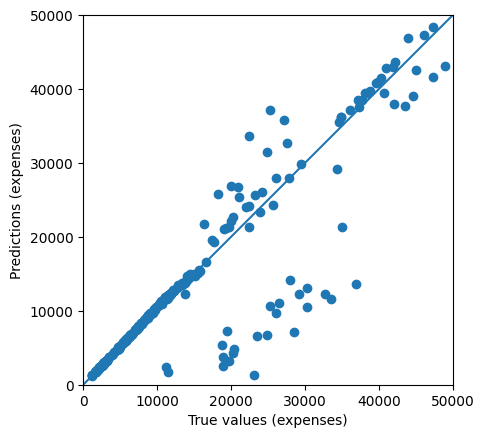

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Convert test data to NumPy arrays
test_dataset = np.array(test_dataset, dtype=np.float32)
test_labels = np.array(test_labels, dtype=np.float32)

# Evaluate the model
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
    print("You passed the challenge. Great job!")
else:
    print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

